# Problem statement

give personalized recommendations to student what to study next and what video to watch each time student completing a test.

given historical data of student performances on test and you’re asked to predict probability of correct answer for the next question.

## Task 

1. Create an Exploratory data analysis (EDA) and create a model to predict probability of is_correct in test.csv file given the training data.
    
2. Briefly Explain your thought process and approach

# Business Problem

from task above we can conclude that we want to predict probability of correct answer for the next question. From business case and from dataset we can create a supervised learning with classification method.

in supervised learning we can create several methods and find the best method that gives the best success matrix. after that we can train that model with hypermeter tunning to get best hyperparameter set so we can improve our model.

success criteria that request from this task is area under the ROC curve between the predicted probability and the observed target. 

the expected output is a submission.csv file with the same format as submission_example.csv file.

the dataset come from the task so we can assume that the data was clean and easy to access.

# Library

In [28]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [29]:
%load_ext autoreload
%autoreload 2

import sys
sys.path.append(f'E:\gitlab\custom-script\script')
from ursar import describe,visual,tunning,fe, model, scoring, feature_importance

%reload_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Dataset

## Files

In [173]:
train = pd.read_csv('train.csv')
train.head()

,user_id,session_id,session_no,topic,sub_topic,learning_node,question_id,question_type,session_question_no,learning_node_question_no,question_difficulty,question_number_of_choice,question_number_of_correct_choice,question_number_of_correct_selected,question_number_of_wrong_selected,ms_first_response,is_correct,row_id
0,2348875,5473538500,1.0,1064573894,6164056362,1683819444,2226271822,Single choice,1,1,medium,4,1,0,1,18.0,0.0,0
1,2348875,5473538500,1.0,1064573894,6164056362,1683819444,2226271822,Single choice,2,2,medium,4,1,0,1,12.0,0.0,1
2,2348875,3206055652,2.0,1064573894,6164056362,1683819444,5592568637,Single choice,1,1,medium,4,1,1,0,11.0,1.0,2
3,2766044,9605991415,1.0,4794286044,6471306273,3791168789,1243898418,Single choice,1,1,medium,4,1,1,0,47.0,1.0,3
4,2766044,7255460452,2.0,4794286044,2158335016,7856645946,4732798598,Single choice,1,1,medium,4,1,1,0,7.0,1.0,4


In [174]:
test = pd.read_csv('test.csv')
test.head()

,user_id,session_id,session_no,topic,sub_topic,learning_node,question_id,question_type,session_question_no,learning_node_question_no,question_difficulty,question_number_of_choice,question_number_of_correct_choice,row_id
0,2348875,3206055652,2.0,1064573894,6164056362,1683819444,2226271822,Single choice,2,2,medium,4,1,0
1,2766044,2972889287,11.0,1737274108,6197171301,8772005155,8350981375,Single choice,6,2,medium,4,1,1
2,3604867,8630265714,4.0,2624511878,5665086549,1064446677,7911407965,Single choice,8,2,NaN,4,1,2
3,4061807,7315912009,10.0,147927464,5665086549,7469873307,2368078655,Single choice,7,1,NaN,4,1,3
4,5713467,7344767708,3.0,253258722,2774427363,3261917054,6616709393,Single choice,9,3,medium,4,1,4


# Data understanding

## Dataset info

In [6]:
describe.describe_data(train)

'table size 286886 x 18'

Dataframe has 18 columns.
There are 1 columns that have missing values.


,column_names,Data Type,Missing Values,% missing,low Value,Hi Value,stddev Value,unique
0,user_id,int64,0,0.00,2348875,9997990646,2875513775,7000.0
1,session_id,int64,0,0.00,424084,9999846794,2878680609,47222.0
2,session_no,float64,0,0.00,1,1311,164,1311.0
3,topic,int64,0,0.00,1952256,9999385357,3013026089,1639.0
4,sub_topic,int64,0,0.00,1314703,9993728634,1932006810,2265.0
5,learning_node,int64,0,0.00,4985900,9999782161,2889600192,12093.0
6,question_id,int64,0,0.00,179554,9999972554,2921249861,30653.0
7,question_type,object,0,0.00,0,0,0,3.0
8,session_question_no,int64,0,0.00,1,44,4,44.0
9,learning_node_question_no,int64,0,0.00,1,32,1,32.0


In [7]:
describe.describe_data(test)

'table size 7000 x 14'

Dataframe has 14 columns.
There are 1 columns that have missing values.


,column_names,Data Type,Missing Values,% missing,low Value,Hi Value,stddev Value,unique
0,user_id,int64,0,0.0,2348875,9997990646,2880925984,7000.0
1,session_id,int64,0,0.0,1104080,9999097475,2878866406,7000.0
2,session_no,float64,0,0.0,1,1311,30,116.0
3,topic,int64,0,0.0,1952256,9999385357,3101228743,1132.0
4,sub_topic,int64,0,0.0,10204249,9974498793,2262454745,1229.0
5,learning_node,int64,0,0.0,9253933,9998905485,2926192694,3591.0
6,question_id,int64,0,0.0,338236,9999972554,2950053992,4829.0
7,question_type,object,0,0.0,0,0,0,2.0
8,session_question_no,int64,0,0.0,1,45,5,27.0
9,learning_node_question_no,int64,0,0.0,1,33,1,9.0


## Define data

from the examples above we can conclude:

1. unit analysis is `user ID`

2. features that we want to analyst and have high probability to become input for our model later are:

    a. session_no
    
    b. topic

    c. sub_topic

    d. learning_node

    e. question_id

    f. question_type

    g. session_question_no

    h. learning_node_question_no

    i. question_difficulty

    j. question_number_of_choice


3. these are features that just a unique ID, haven't impact to our data or only have single value for entire dataset, there are:
   
    a. session_id

    b. row_id
    
    c. question_number_of_correct_choice

4. These are features just exist at training data and didn,t exist at testing data so these features can't be include in train data

    a. ms_first_response

    b. question_number_of_wrong_selected

    c. question_number_of_correct_selected
    
    
5. The label data is `is_correct` with binary unique value, so we want to create model of binary classification supervised learning. `1 if correct and 0 otherwise`

from selected features we can seperate them to numerical and categorical data so we can easy to planning next step:

from dataset info previously we got all munerical data from training dataset for all features with numeric value and just single categorical data. But if we look deeper for every feature we can conclude some features are better to be categorical rather than numerical such as:

a. topic

b. sub_topic

c. learning_node

d. question_id

because at these features number just a separating value from each other number and have not a meaningful order. so we plan to change these features data type to categorical.

There is a note here, because the range of these features is to high for academic purpose (i.e. 1132 topics in academic is huge number of topic) so we can assume these features are random value.

however, if these features will become categorical, we found out that in test dataset there are rows that have unlist value in these 4 features at training dataset (you can see detail at `unlist value from test dataset compare to train dataset`). This condition is kinda bad because these 4 features are quite related to business case that we want to solve (i.e. some topics / sub topics are difficult for some students and will give enough weight for some students to give a correct answer). 

because of that, we will propose to give a weight of evidence encoding for these features. this kind of encoding will measures the “strength” of a grouping technique to separate true and false (from label data) and also this method create binning process to create a few categories. binning process is good for these features because although these features have not a meaningful order, but in some cases (i.e. topic about something) the similiar topic always close for each other, so we can assume binning process is fine for the dataset. another argument is all the unlist data still in the range of these features at training data look at `comparing unlist value from training data to test data, did the unlist data still in the range of training data?` so binning process can work fine with our dataset.

one of the features has high missing value, this feature `question_difficulty` has 58% missing value from training dataset and 41% from test dataset.
there are many ways to handle this feature:

1. we can remove it from all dataset

2. we can filling it with random value from known range value (but this method will lead to huge variance because we lost almost 50% confident for this feature and because this feature is categorical, random filling will lead to miss interpretation)

3. create new value for missing value (this method may be the best solution expecially for categorical, and we can create OHE for this feature and create 1 column to give value where missing value occur)

## Unlist value from test dataset compare to train dataset

In [8]:
test[~test['topic'].isin(train['topic'])]

,user_id,session_id,session_no,topic,sub_topic,learning_node,question_id,question_type,session_question_no,learning_node_question_no,question_difficulty,question_number_of_choice,question_number_of_correct_choice,row_id
2251,3172304218,6089320365,10.0,7965792980,6028671853,4690301528,3405472432,Single choice,1,1,medium,4,1,2251
3793,5379331392,1595179603,7.0,4231385167,5665086549,6395264132,5278745365,Single choice,1,1,NaN,5,1,3793
5383,7634315972,8227487092,2.0,1154474360,3007338813,8081729241,8569812195,Single choice,1,1,medium,5,1,5383
5967,8475903903,8888589494,3.0,6137286633,2855158986,9131938417,5549837575,Single choice,1,1,medium,4,1,5967
6113,8697871451,1963868665,2.0,9379519776,1698816542,4449847444,5959431743,Single choice,1,1,medium,4,1,6113


In [9]:
test[~test['sub_topic'].isin(train['sub_topic'])]

,user_id,session_id,session_no,topic,sub_topic,learning_node,question_id,question_type,session_question_no,learning_node_question_no,question_difficulty,question_number_of_choice,question_number_of_correct_choice,row_id
16,31096286,4935449409,21.0,7698081065,8494431232,7531642834,7395238231,Single choice,1,1,medium,5,1,16
651,949706212,5097570453,1.0,4444322909,221225755,8375959185,930873949,Single choice,5,1,medium,5,1,651
1224,1712017337,1977901645,1.0,1957384178,2877607674,5379146646,9944632419,Single choice,5,1,medium,5,1,1224
4918,6993987802,9158250163,1.0,2904461013,2195376043,3757499870,1898943844,Single choice,5,1,medium,5,1,4918


In [10]:
test[~test['learning_node'].isin(train['learning_node'])]

,user_id,session_id,session_no,topic,sub_topic,learning_node,question_id,question_type,session_question_no,learning_node_question_no,question_difficulty,question_number_of_choice,question_number_of_correct_choice,row_id
124,175768950,6068179256,1.0,7782355726,5665086549,9456016016,6326974992,Single choice,6,1,NaN,5,1,124
141,199796999,4003506723,2.0,2373689175,1808541640,4271422668,1366995099,Single choice,7,1,medium,5,1,141
195,275884425,9299936660,1.0,9571703988,4248113749,8071390837,6946342972,Single choice,9,1,medium,5,1,195
299,433567593,894883782,1.0,7355707374,5665086549,6788581348,1667422462,Single choice,2,1,NaN,5,1,299
375,528873677,6458146634,21.0,9813543922,3845158305,9354664726,3678458087,Single choice,8,1,medium,5,1,375
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6538,9336481191,3982168154,1.0,7368974261,7539953578,9403995534,3324709555,Single choice,5,1,medium,5,1,6538
6801,9704168779,4764572647,16.0,9072251744,6028671853,9137050916,700270568,Single choice,8,1,medium,4,1,6801
6837,9771177228,8802502204,2.0,701160701,9662448319,1654827980,7702943795,Single choice,6,1,medium,5,1,6837
6899,9860654599,2290296405,1.0,227751039,7244770119,6109881556,3963782537,Single choice,13,1,medium,5,1,6899


In [11]:
test[~test['question_id'].isin(train['question_id'])]

,user_id,session_id,session_no,topic,sub_topic,learning_node,question_id,question_type,session_question_no,learning_node_question_no,question_difficulty,question_number_of_choice,question_number_of_correct_choice,row_id
34,53501860,9789010669,1.0,3070768229,9710050288,6965979883,4072300635,Single choice,6,3,medium,4,1,34
40,65410125,6941023428,9.0,5481091354,2230285223,2465188488,5933428626,Single choice,2,2,medium,4,1,40
48,79246003,1522584804,1.0,4524197618,1906871219,8260971862,3946876502,Single choice,14,2,medium,5,1,48
70,102548374,3919301125,1.0,7207679382,6521270055,7646070404,6452304698,Single choice,3,3,medium,5,1,70
85,122624186,4641634284,1.0,144815081,3763689638,8419046807,9095763210,Single choice,2,2,medium,5,1,85
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6981,9973419602,9466302379,1.0,9972533064,8607737295,7677200932,3837184927,Single choice,2,2,medium,4,1,6981
6986,9979680855,6747643499,2.0,8640910518,4444442673,5170944250,2336495034,Single choice,1,1,medium,4,1,6986
6988,9981754407,5128024958,1.0,1676475660,1345997982,7996123806,2100463006,Single choice,7,1,medium,4,1,6988
6992,9985081626,1960503530,1.0,5970464404,8363968718,7359359464,5953566422,Single choice,4,1,medium,5,1,6992


### comparing unlist value from training data to test data, did the unlist data still in the range of training data?

In [12]:
test[test['topic'] > np.max(train['topic'])]

,user_id,session_id,session_no,topic,sub_topic,learning_node,question_id,question_type,session_question_no,learning_node_question_no,question_difficulty,question_number_of_choice,question_number_of_correct_choice,row_id


In [13]:
test[test['sub_topic'] > np.max(train['sub_topic'])]

,user_id,session_id,session_no,topic,sub_topic,learning_node,question_id,question_type,session_question_no,learning_node_question_no,question_difficulty,question_number_of_choice,question_number_of_correct_choice,row_id


In [14]:
test[test['learning_node'] > np.max(train['learning_node'])]

,user_id,session_id,session_no,topic,sub_topic,learning_node,question_id,question_type,session_question_no,learning_node_question_no,question_difficulty,question_number_of_choice,question_number_of_correct_choice,row_id


In [15]:
test[test['question_id'] > np.max(train['question_id'])]

,user_id,session_id,session_no,topic,sub_topic,learning_node,question_id,question_type,session_question_no,learning_node_question_no,question_difficulty,question_number_of_choice,question_number_of_correct_choice,row_id


# EDA

In [16]:
train.columns

Index(['user_id', 'session_id', 'session_no', 'topic', 'sub_topic',
       'learning_node', 'question_id', 'question_type', 'session_question_no',
       'learning_node_question_no', 'question_difficulty',
       'question_number_of_choice', 'question_number_of_correct_choice',
       'question_number_of_correct_selected',
       'question_number_of_wrong_selected', 'ms_first_response', 'is_correct',
       'row_id'],
      dtype='object')

In [52]:
col = ['session_no', 'topic', 'sub_topic',
       'learning_node', 'question_id','question_type', 'session_question_no',
       'learning_node_question_no','question_difficulty',
       'question_number_of_choice', 
       'is_correct']

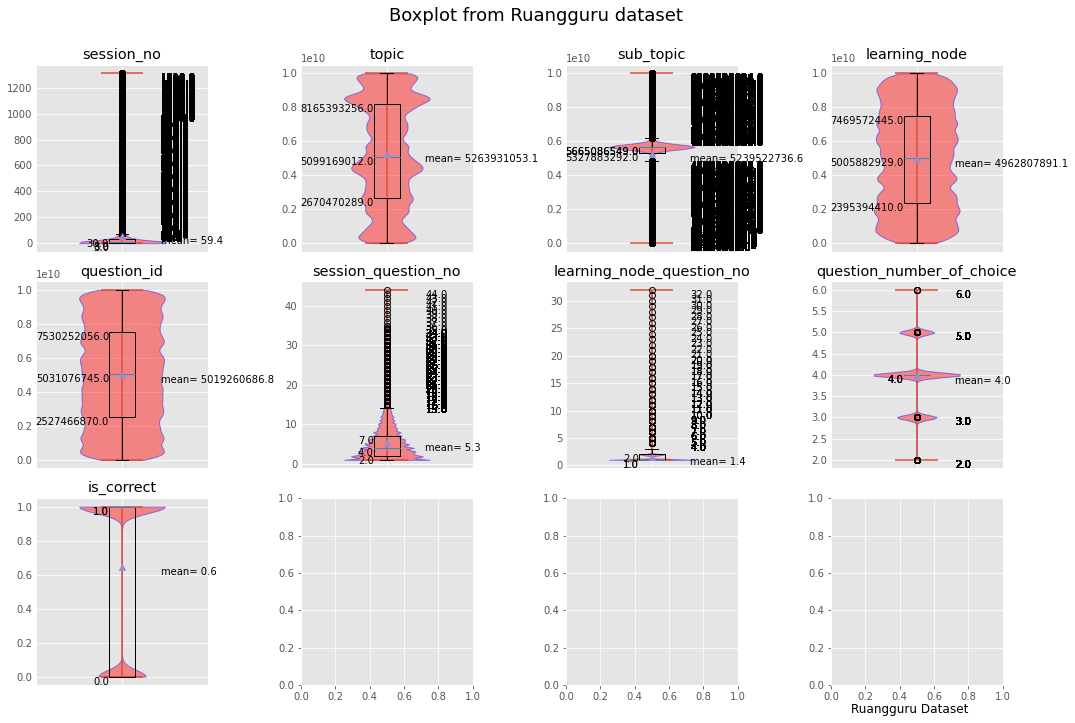

In [18]:
visual.boxplot(train,col,row_col=(3,4)
               ,title="Ruangguru",footnote='Ruangguru Dataset')

from boxplot we can conclude that:

1. we have high outlier for `session_no`, `learning_node_question_no`, `session_question_no` and one feature with outlier for both side at `sub_topic`

2. 3 features with good distribution (as the box plot shown) are `topic`, `learning_node` and `question_id`

3. `question_number_of choice` has categorical data type with high unique count at number 4

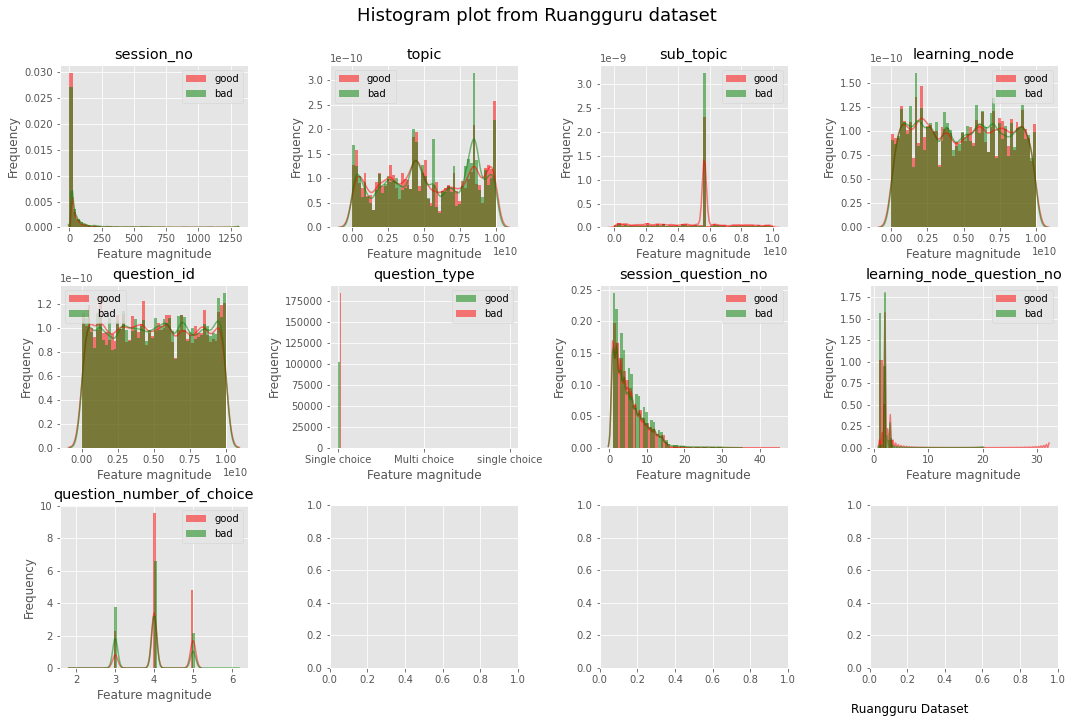

In [25]:
visual.histogram_columns(train[col],'is_correct',label=["good", "bad"],
                         row_col=(3,4),bins=50,title="Ruangguru",
                         footnote='Ruangguru Dataset')

from plot above we can find that `sub_topic`, `question_number_of_choice` and `question_type` have quite distince value for each classes at label.

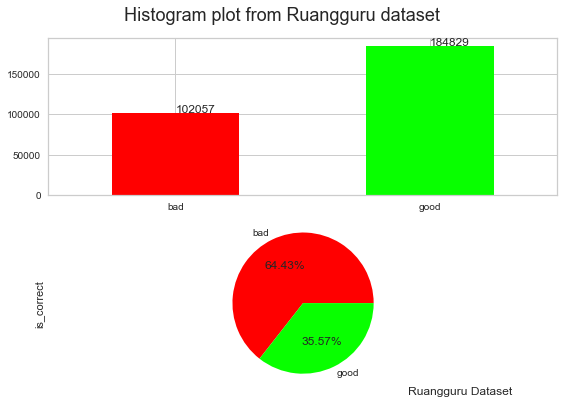

In [56]:
visual.bar_and_pie_plot(train,'is_correct',label=["bad","good"],
                        title="Ruangguru", footnote='Ruangguru Dataset')

from our dataset we found that we have imbalance dataset with bad(0):good(1) ratio about 64:36. so, we can perpose to add imbalance handleing process such as smote, Nearmiss, or under-sampling etc.

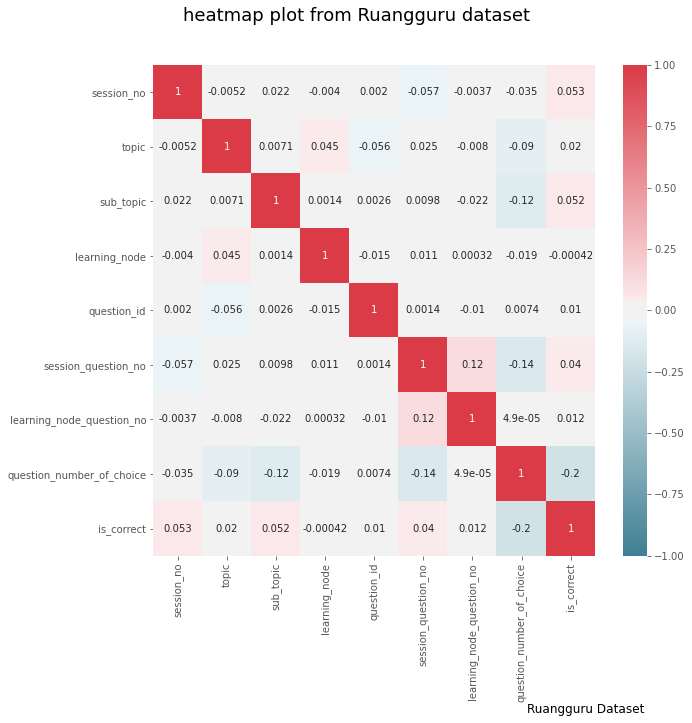

In [39]:
visual.heatmap_corr(train[col],"pearson",
                    title="Ruangguru", footnote='Ruangguru Dataset')

from plot above we found that there is no high corelation between features (more than 0.5). this is good start because be don't need to change those features except all the steps that we have plan before.

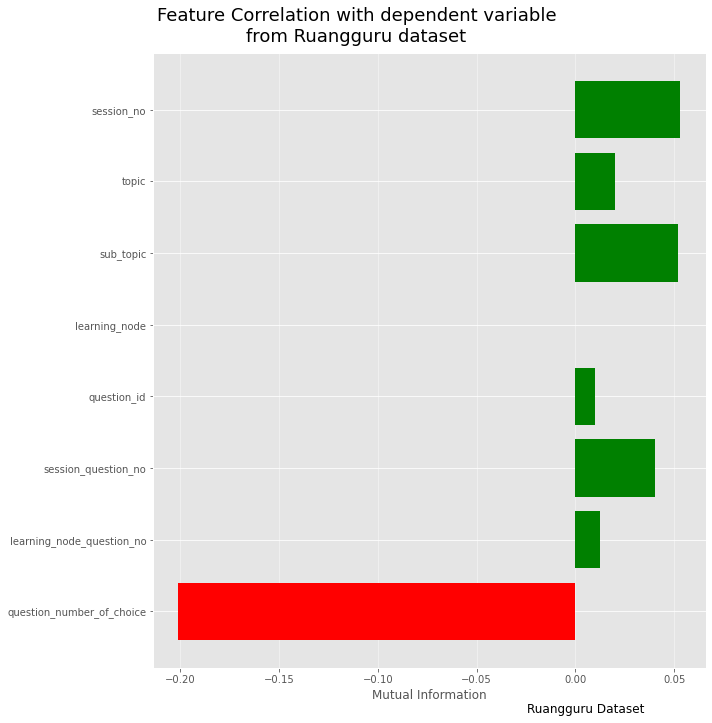

In [41]:
visual.label_corr(train[col],'is_correct',type_coor="pearson",
                  title="Ruangguru", footnote='Ruangguru Dataset')

as we can see we got high corelation at `question_number_of_choice` to label data. we will see this plot again after we have doing some feature engineering to see changing value from this plot.

In [57]:
col = ['session_no', 'topic', 'sub_topic',
       'learning_node', 'question_id', 'session_question_no',
       'learning_node_question_no',
       'question_number_of_choice', 
       'is_correct']

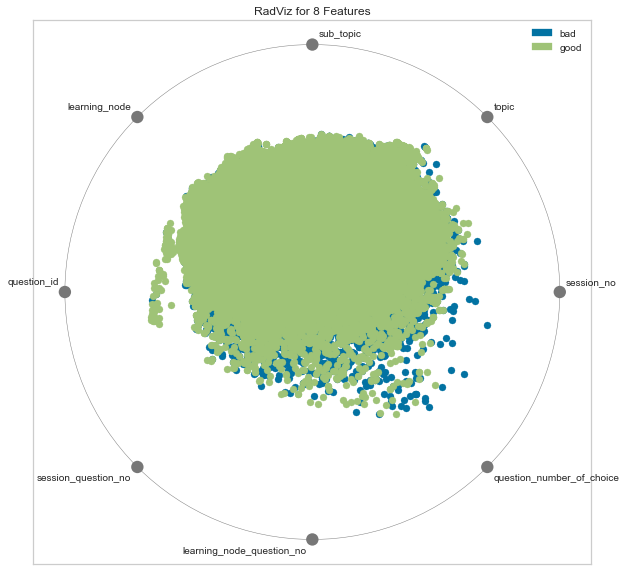

In [58]:
visual.radviz(train[col],'is_correct',labels=["bad","good"])

from this plot we can see that we create multivariate data visualization to see how well separability between classes compare with features. as we can see we almost can't to detect separability between classes and maybe it lead to low opportunity to learn from the feature set for prediction.

# Feature Engineering

## Selected Columns

In [175]:
col = ['session_no', 'topic', 'sub_topic',
       'learning_node', 'question_id',"question_type", 'session_question_no',
       'learning_node_question_no','question_difficulty',
       'question_number_of_choice','is_correct']

In [176]:
train = train[col]

In [177]:
describe.describe_data(train)

'table size 286886 x 11'

Dataframe has 11 columns.
There are 1 columns that have missing values.


,column_names,Data Type,Missing Values,% missing,low Value,Hi Value,stddev Value,unique
0,session_no,float64,0,0.00,1,1311,164,1311.0
1,topic,int64,0,0.00,1952256,9999385357,3013026089,1639.0
2,sub_topic,int64,0,0.00,1314703,9993728634,1932006810,2265.0
3,learning_node,int64,0,0.00,4985900,9999782161,2889600192,12093.0
4,question_id,int64,0,0.00,179554,9999972554,2921249861,30653.0
5,question_type,object,0,0.00,0,0,0,3.0
6,session_question_no,int64,0,0.00,1,44,4,44.0
7,learning_node_question_no,int64,0,0.00,1,32,1,32.0
8,question_difficulty,object,166513,58.04,0,0,0,4.0
9,question_number_of_choice,int64,0,0.00,2,6,1,5.0


## WoE Transform

In [178]:
train,topic_res = fe.encode(train,'topic','woe',
                            label_col='is_correct',label=['bad','good'])

In [179]:
train,sub_topic_res = fe.encode(train,'sub_topic','woe',
                            label_col='is_correct',label=['bad','good'])

In [180]:
train,learning_node_res = fe.encode(train,'learning_node','woe',
                            label_col='is_correct',label=['bad','good'])

In [181]:
train,question_id_res = fe.encode(train,'question_id','woe',
                            label_col='is_correct',label=['bad','good'])

In [117]:
train = train.drop(columns = ["topic",'sub_topic','learning_node','question_id'])

In [118]:
describe.describe_data(train)

'table size 286886 x 11'

Dataframe has 11 columns.
There are 1 columns that have missing values.


,column_names,Data Type,Missing Values,% missing,low Value,Hi Value,stddev Value,unique
0,session_no,float64,0,0.00,1,1311,164,1311.0
1,question_type,object,0,0.00,0,0,0,3.0
2,session_question_no,int64,0,0.00,1,44,4,44.0
3,learning_node_question_no,int64,0,0.00,1,32,1,32.0
4,question_difficulty,object,166513,58.04,0,0,0,4.0
5,question_number_of_choice,int64,0,0.00,2,6,1,5.0
6,is_correct,float64,0,0.00,0,1,0,2.0
7,topic_WoE_Encode,float64,0,0.00,-9999,14,232,1019.0
8,sub_topic_WoE_Encode,float64,0,0.00,-9999,14,391,807.0
9,learning_node_WoE_Encode,float64,0,0.00,-9999,14,1178,1369.0


## Encode Transform

### question_difficulty

In [49]:
train['question_difficulty'] = train['question_difficulty'].replace(np.nan, "None")

In [50]:
train['question_difficulty'].unique()

array(['medium', 'None', 'easy', 'hard', 'hots'], dtype=object)

In [51]:
train = fe.encode(train,['question_difficulty'],"ohe")

In [52]:
train

,session_no,question_type,session_question_no,learning_node_question_no,question_number_of_choice,is_correct,topic_WoE_Encode,sub_topic_WoE_Encode,learning_node_WoE_Encode,question_id_WoE_Encode,question_difficulty_None,question_difficulty_easy,question_difficulty_hard,question_difficulty_hots,question_difficulty_medium
0,1.0,Single choice,1,1,4,0.0,1.284016,1.351203,1.351203,1.306252,0,0,0,0,1
1,1.0,Single choice,2,2,4,0.0,1.284016,1.351203,1.351203,1.306252,0,0,0,0,1
2,2.0,Single choice,1,1,4,1.0,1.284016,1.351203,1.351203,1.386294,0,0,0,0,1
3,1.0,Single choice,1,1,4,1.0,0.285275,0.583146,-0.154151,0.405465,0,0,0,0,1
4,2.0,Single choice,1,1,4,1.0,0.285275,0.729961,0.887303,13.815511,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
286881,56.0,Single choice,9,1,3,1.0,1.969312,0.947891,1.951845,2.622436,1,0,0,0,0
286882,56.0,Single choice,10,2,3,1.0,1.969312,0.947891,1.951845,2.622436,1,0,0,0,0
286883,57.0,Single choice,1,1,3,1.0,1.809824,0.947891,4.718499,4.718499,1,0,0,0,0
286884,57.0,Single choice,2,1,3,1.0,1.809824,0.947891,3.601868,3.601868,1,0,0,0,0


### question_type

In [53]:
train['question_type'].unique()

array(['Single choice', 'Multi choice', 'single choice'], dtype=object)

In [54]:
train['question_type'] = train['question_type'].replace("single choice", "Single choice")

In [55]:
train['question_type'].unique()

array(['Single choice', 'Multi choice'], dtype=object)

In [56]:
key = [{0.0:"Single choice", 1.0:'Multi choice'}]

In [57]:
train,dicts = fe.mapping(train,['question_type'],"def",key)

In [58]:
train

,session_no,question_type,session_question_no,learning_node_question_no,question_number_of_choice,is_correct,topic_WoE_Encode,sub_topic_WoE_Encode,learning_node_WoE_Encode,question_id_WoE_Encode,question_difficulty_None,question_difficulty_easy,question_difficulty_hard,question_difficulty_hots,question_difficulty_medium
0,1.0,0.0,1,1,4,0.0,1.284016,1.351203,1.351203,1.306252,0,0,0,0,1
1,1.0,0.0,2,2,4,0.0,1.284016,1.351203,1.351203,1.306252,0,0,0,0,1
2,2.0,0.0,1,1,4,1.0,1.284016,1.351203,1.351203,1.386294,0,0,0,0,1
3,1.0,0.0,1,1,4,1.0,0.285275,0.583146,-0.154151,0.405465,0,0,0,0,1
4,2.0,0.0,1,1,4,1.0,0.285275,0.729961,0.887303,13.815511,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
286881,56.0,0.0,9,1,3,1.0,1.969312,0.947891,1.951845,2.622436,1,0,0,0,0
286882,56.0,0.0,10,2,3,1.0,1.969312,0.947891,1.951845,2.622436,1,0,0,0,0
286883,57.0,0.0,1,1,3,1.0,1.809824,0.947891,4.718499,4.718499,1,0,0,0,0
286884,57.0,0.0,2,1,3,1.0,1.809824,0.947891,3.601868,3.601868,1,0,0,0,0


In [59]:
describe.describe_data(train)

'table size 286886 x 15'

Dataframe has 15 columns.
There are 0 columns that have missing values.


,column_names,Data Type,Missing Values,% missing,low Value,Hi Value,stddev Value,unique
0,session_no,float64,0,0.0,1,1311,164,1311.0
1,question_type,float64,0,0.0,0,1,0,2.0
2,session_question_no,int64,0,0.0,1,44,4,44.0
3,learning_node_question_no,int64,0,0.0,1,32,1,32.0
4,question_number_of_choice,int64,0,0.0,2,6,1,5.0
5,is_correct,float64,0,0.0,0,1,0,2.0
6,topic_WoE_Encode,float64,0,0.0,-9999,14,232,1019.0
7,sub_topic_WoE_Encode,float64,0,0.0,-9999,14,391,807.0
8,learning_node_WoE_Encode,float64,0,0.0,-9999,14,1178,1369.0
9,question_id_WoE_Encode,float64,0,0.0,-9999,14,2145,1125.0


### take a look to our relation of our dataset

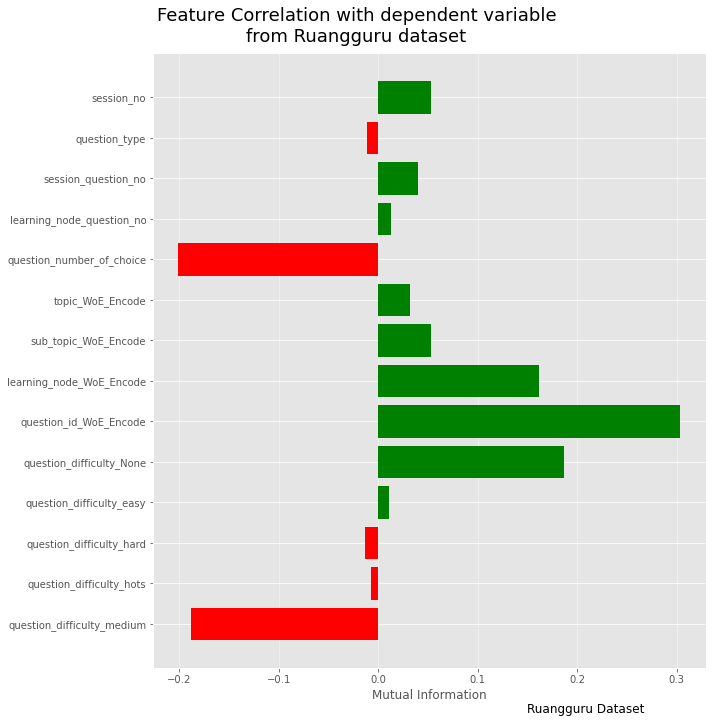

In [26]:
visual.label_corr(train,'is_correct',type_coor="pearson",
                  title="Ruangguru", footnote='Ruangguru Dataset')

as we can see, we got high positive corellation from `learning_node_WoE_Encode`, `question_id_WoE_Encode` and `question_difficulty_None` and high negative corellation from `question_number_of_choice` and `question_difficulty_medium`

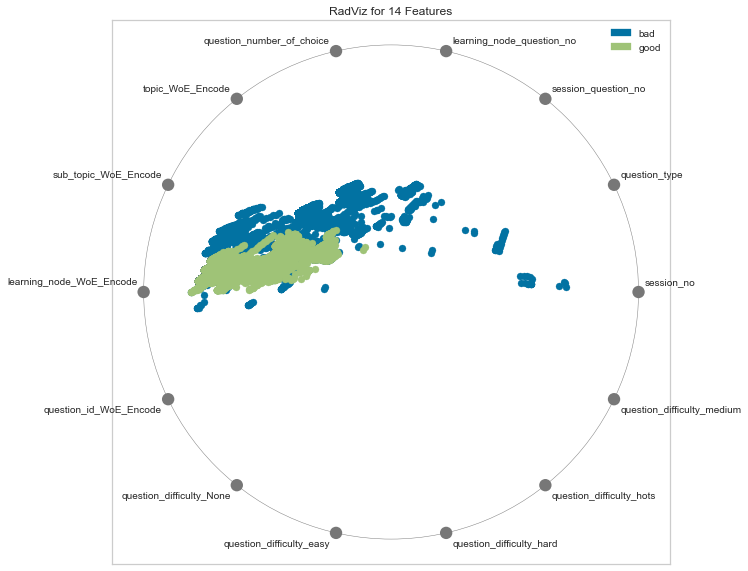

In [27]:
visual.radviz(train,'is_correct',labels=["bad","good"])

Firstly, from plot above we can see that our dataset has good separability between classes in label. secondly, from this plot  we can conclude that we have opportunity to learn from our features set and chance our features just bunch of noise is low.

# Feature Importance 

ursar
feature_importance



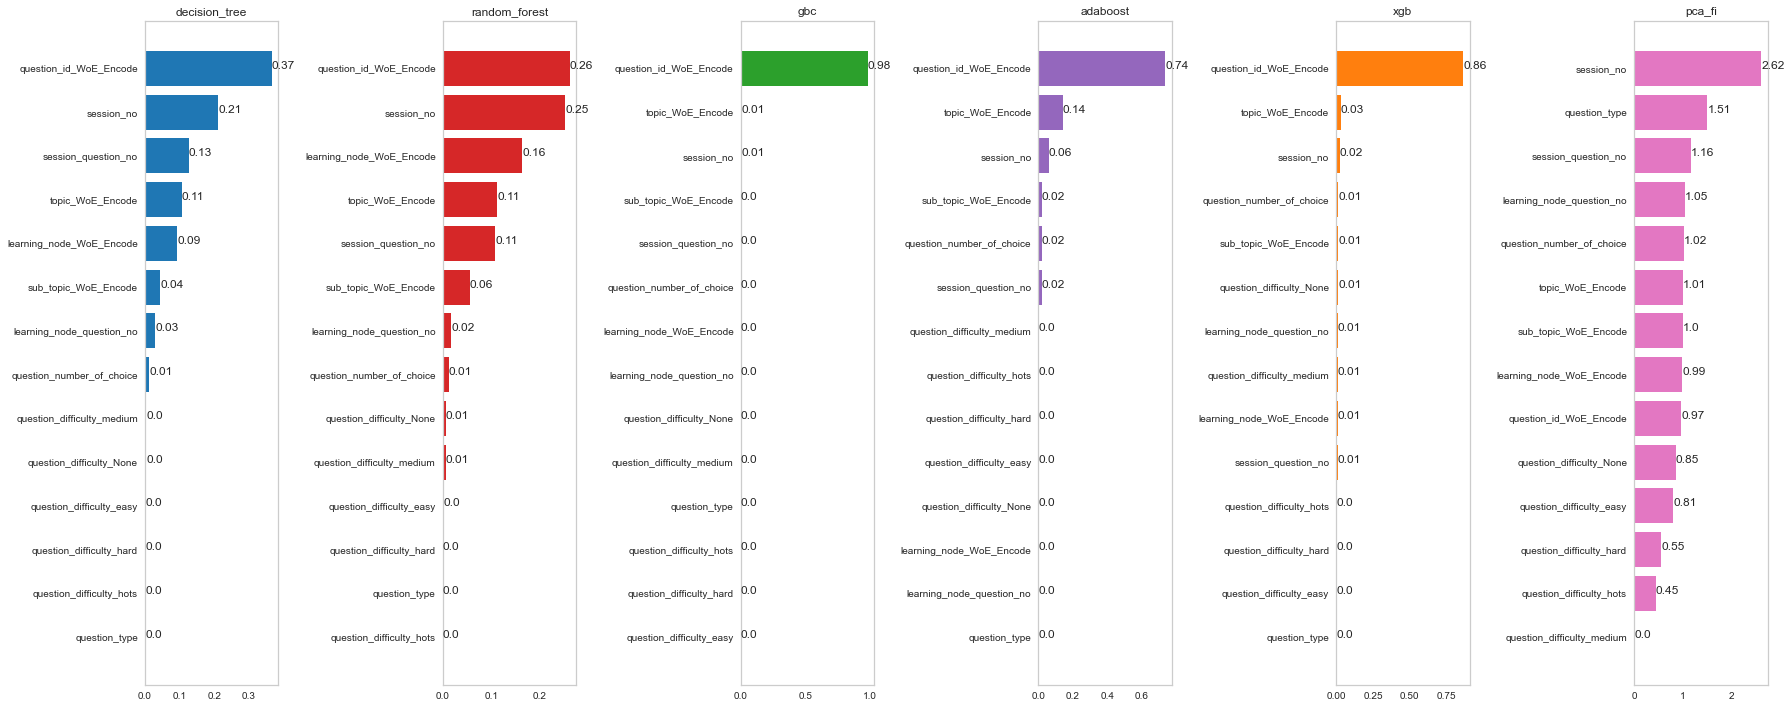

In [28]:
rest = feature_importance(train,'is_correct',20).plot_FI(["all"])

In [31]:
rest

,features,decision_tree,random_forest,gbc,adaboost,xgb,pca_fi
0,session_no,0.2116,0.2533,0.0065,0.06,0.0248,2.6186
1,question_type,0.0002,0.0002,0.0000,0.00,0.0000,1.5114
2,session_question_no,0.1261,0.1087,0.0007,0.02,0.0093,1.1619
3,learning_node_question_no,0.0303,0.0178,0.0004,0.00,0.0113,1.0511
4,question_number_of_choice,0.0123,0.0123,0.0007,0.02,0.0134,1.0219
5,topic_WoE_Encode,0.1056,0.1125,0.0089,0.14,0.0318,1.0073
6,sub_topic_WoE_Encode,0.0447,0.0555,0.0013,0.02,0.0119,1.0020
7,learning_node_WoE_Encode,0.0936,0.1641,0.0005,0.00,0.0105,0.9865
8,question_id_WoE_Encode,0.3662,0.2626,0.9808,0.74,0.8646,0.9743
9,question_difficulty_None,0.0033,0.0059,0.0002,0.00,0.0116,0.8550


from feature importance above we found that `question_type` has low importance value and `question_id_WoE_Encode` has high importance value.

# Model

## Seperate feature and label set 

In [60]:
X = train.drop(["is_correct"], axis=1)
y = train["is_correct"]

## Split data 

this process we will split data to become train and validate before we apply our model to test dataset

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                    test_size = 0.2, random_state=None)

In [62]:
print('X_train size shape= {0}' .format(X_train.shape))
print('X_test size shape= {0}' .format(X_test.shape))
print('y_train size shape= {0}' .format(y_train.shape))
print('y_test size shape= {0}' .format(y_test.shape))

X_train size shape= (229508, 14)
X_test size shape= (57378, 14)
y_train size shape= (229508,)
y_test size shape= (57378,)


## Train the dataset with 5 fold and hyperparameter default

In [63]:
result,proba = model.cv_model_train(X_train.to_numpy(), y_train.to_numpy(),
                  ['random_forest',"adaboost","gb","xgb",'naive_bayes','lr'],5)

Finished training for model:
Random Forest
Ada Boosting
Gradient Boosting
Extra Gradient Boosting
Logistic Regression
Naive Bayes


In [64]:
result

,Method,accuracy,accuracy_std,balanced_acc,balanced_acc_std,F1,F1_std,AUC,AUC_std,AUC_ROC,AUC_ROC_std,Recall,Recall_std,Precision,Precision_std,Fit Time,Pred Time
0,Gradient Boosting,0.7537,0.0028,0.7032,0.0032,0.7440,0.0033,0.8906,0.0010,0.8191,0.0011,0.8785,0.0011,0.7711,0.0038,56.2884,0.2936
1,Extra Gradient Boosting,0.7536,0.0012,0.7027,0.0026,0.7437,0.0019,0.8905,0.0008,0.8189,0.0007,0.8791,0.0046,0.7707,0.0036,11.8784,0.2598
2,Logistic Regression,0.7520,0.0017,0.7016,0.0028,0.7423,0.0021,0.8898,0.0015,0.8178,0.0017,0.8762,0.0026,0.7704,0.0022,3.1922,0.1400
3,Ada Boosting,0.7519,0.0020,0.7016,0.0044,0.7422,0.0016,0.8895,0.0016,0.8173,0.0017,0.8759,0.0137,0.7705,0.0048,10.4964,0.6622
4,Random Forest,0.7195,0.0012,0.6815,0.0008,0.7154,0.0012,0.8608,0.0013,0.7778,0.0008,0.8133,0.0015,0.7659,0.0013,40.8637,4.5376
5,Naive Bayes,0.6905,0.0032,0.5664,0.0011,0.6040,0.0041,0.7305,0.0019,0.6300,0.0013,0.9964,0.0003,0.6763,0.0033,0.1732,0.1766


From the table above we got high AUC_ROC at `Gradient Boosting` model

## Hyperparameter Tunning

In [29]:
param_grid = [
{
    'max_depth':[3,5,10],
    'n_estimators':[60,80,100],
    'learning_rate': [0.1,1,10]
}]

In [30]:
res_gs = tunning.gridsearch(X_train, y_train,param_grid,['gb'],
                           scoring='roc_auc',cv=3)

Fitting 3 folds for each of 27 candidates, totalling 81 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  4.4min
[Parallel(n_jobs=-1)]: Done  81 out of  81 | elapsed: 14.9min finished


Best parameter for gb = 
learning_rate 		:	 0.1
max_depth 		:	 5
n_estimators 		:	 100
------------------------------------------------------------------------



### apply best param to model

In [209]:
models,names_model,probs_model,probs_bool_model,pred_model,time_1,time_2 = model.modeling(
    X_train.to_numpy(), X_test.to_numpy(), y_train.to_numpy(), y_test.to_numpy(),list_model=['gb'])

we have done with these models:
Gradient_boosting_Classifier


comfusion matrix = 
[[10813  9590]
 [ 4507 32468]]


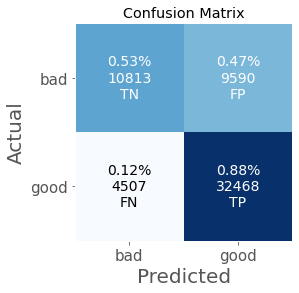


accuracy_score =  0.7543
balanced_accuracy_score =  0.704

precision score =  0.772
average precision score =  0.7564
recall score =  0.8781
Brier score loss (the smaller the better) =  0.1609

F1 score =  0.8216
F2 score =  0.8546
F3 score =  0.8662
F_beta score (0.5) =  0.7911
Matthews Correlation Coefficient score =  0.4416

AUC of Precision-Recall Curve on Testing =  0.8893
Best Threshold for Precision-Recall Curve = 0.426100
F-Score = 0.828
AUC of ROC =  0.8183

Best Threshold for ROC = 0.636000
G-Mean = 0.732
Best Threshold with Youden’s J statistic = 0.636000

Cohens kappa =  0.4322
Gini =  0.7786

Expected Approval Rate =  0.733
Expected Default Rate =  0.228

classification_report
              precision    recall  f1-score   support

         0.0       0.71      0.53      0.61     20403
         1.0       0.77      0.88      0.82     36975

    accuracy                           0.75     57378
   macro avg       0.74      0.70      0.71     57378
weighted avg       0.75     

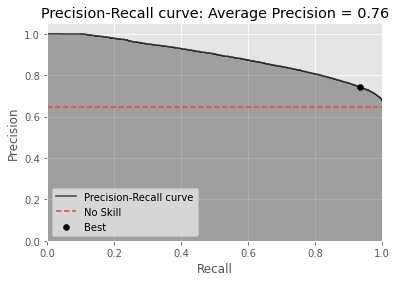

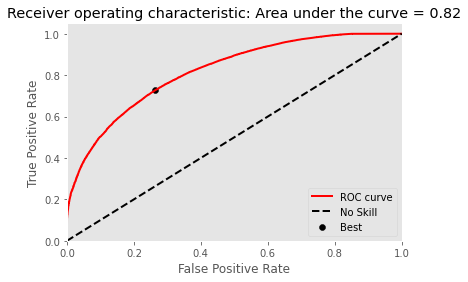


time span=  0:00:42.855037


In [210]:
scoring.print_score(y_test.to_numpy(),pred_model[0],y_probs=probs_model[0],
                    types='classification',labels=["bad","good"],
                    time1=time_1[0],time2=time_2[0],
                    X_train=None, y_train=None,X_test=None)

# Using Test dataset

## Feature engineering for test dataset

In [182]:
col = ['session_no', 'topic', 'sub_topic',
       'learning_node', 'question_id',"question_type", 'session_question_no',
       'learning_node_question_no','question_difficulty',
       'question_number_of_choice']

In [183]:
test = test[col]

In [184]:
for i in test[~test['topic'].isin(train['topic'])]["topic"].values:
    topic_res = topic_res.append(pd.Series([0], index=[i]))

In [185]:
for i in test[~test['sub_topic'].isin(train['sub_topic'])]["sub_topic"].values:
    sub_topic_res = sub_topic_res.append(pd.Series([0], index=[i]))

In [186]:
for i in test[~test['question_id'].isin(train['question_id'])]["question_id"].values:
    question_id_res = question_id_res.append(pd.Series([0], index=[i]))

In [187]:
for i in test[~test['learning_node'].isin(train['learning_node'])]["learning_node"].values:
    learning_node_res = learning_node_res.append(pd.Series([0], index=[i]))

In [189]:
learning_node_res = learning_node_res.groupby(learning_node_res.index).first()
question_id_res = question_id_res.groupby(question_id_res.index).first()

In [190]:
test.loc[:,'topic_WoE_Encode'] = test['topic'].map(topic_res)
test.loc[:,'sub_topic_WoE_Encode'] = test['sub_topic'].map(sub_topic_res)
test.loc[:,'learning_node_WoE_Encode'] = test['learning_node'].map(learning_node_res)
test.loc[:,'question_id_WoE_Encode'] = test['question_id'].map(question_id_res)

In [191]:
test = test.drop(columns = ["topic",'sub_topic','learning_node','question_id'])

In [192]:
test['question_difficulty'] = test['question_difficulty'].replace(np.nan, "None")
test = fe.encode(test,['question_difficulty'],"ohe")

In [193]:
test['question_type'].unique()

array(['Single choice', 'Multi choice'], dtype=object)

In [194]:
key = [{0.0:"Single choice", 1.0:'Multi choice'}]
test,dicts = fe.mapping(test,['question_type'],"def",key)

In [195]:
test

,session_no,question_type,session_question_no,learning_node_question_no,question_number_of_choice,topic_WoE_Encode,sub_topic_WoE_Encode,learning_node_WoE_Encode,question_id_WoE_Encode,question_difficulty_None,question_difficulty_easy,question_difficulty_hard,question_difficulty_hots,question_difficulty_medium
0,2.0,0.0,2,2,4,1.284016,1.351203,1.351203,1.306252,0,0,0,0,1
1,11.0,0.0,6,2,4,0.198851,-0.048790,0.538997,1.252763,0,0,0,0,1
2,4.0,0.0,8,2,4,0.173746,0.947891,0.243346,0.287682,1,0,0,0,0
3,10.0,0.0,7,1,4,0.374049,0.947891,1.321756,0.451985,1,0,0,0,0
4,3.0,0.0,9,3,4,0.127388,0.072162,0.451985,0.916291,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6995,18.0,0.0,1,1,5,0.312490,0.947891,0.274279,-0.305163,1,0,0,0,0
6996,1.0,0.0,6,1,4,0.186251,-0.315853,-0.628609,-9999.000000,0,0,0,0,1
6997,6.0,0.0,14,2,5,0.530628,13.815511,13.815511,0.000000,0,0,0,0,1
6998,4.0,0.0,14,2,4,-0.201866,0.000000,1.386294,13.815511,0,0,0,0,1


In [196]:
describe.describe_data(test)

'table size 7000 x 14'

Dataframe has 14 columns.
There are 0 columns that have missing values.


,column_names,Data Type,Missing Values,% missing,low Value,Hi Value,stddev Value,unique
0,session_no,float64,0,0.0,1,1311,30,116.0
1,question_type,float64,0,0.0,0,1,0,2.0
2,session_question_no,int64,0,0.0,1,45,5,27.0
3,learning_node_question_no,int64,0,0.0,1,33,1,9.0
4,question_number_of_choice,int64,0,0.0,2,5,1,4.0
5,topic_WoE_Encode,float64,0,0.0,-9999,14,585,851.0
6,sub_topic_WoE_Encode,float64,0,0.0,-9999,14,597,702.0
7,learning_node_WoE_Encode,float64,0,0.0,-9999,14,1718,1138.0
8,question_id_WoE_Encode,float64,0,0.0,-9999,14,2634,872.0
9,question_difficulty_None,uint8,0,0.0,0,0,0,2.0


## apply model to test dataset

In [197]:
y_probs_test = models[0].predict_proba(test)[:, 1]

In [200]:
y_probs_test = pd.Series(y_probs_test)

## create submission file

In [206]:
y_probs_test.to_csv( 'submission.csv',index=True,index_label=['row_id'],header=['is_correct'])

# Notes

this result is far from the best result and we can improve at some process, such as:

1. if we got correct value for "topic",'sub_topic','learning_node','question_id' there is probability to get better result.

2. Other supporting features can also be added (that need to be consulted back to the experts) to improve the generalization of the model 

3. using more feature engineering to get more detail dataset.

4. I've done smote and near miss process but the result is lower than what we have in this result.

5. try to find the best value for hyperparameter and more wider value to get better result and dont stuck in the local optimum / minimum

6. try to use other hyperparameter tunning such as nature inspired algorithms (although the process will be longer)